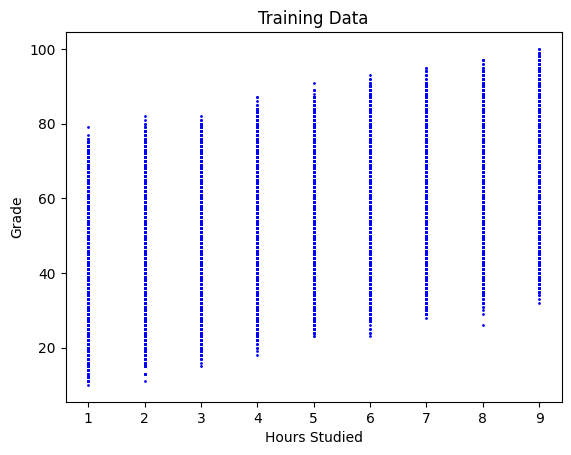

In [13]:
import matplotlib.pyplot as plt
import torch
from letsbuildmodels.datasets.student_performance import get_student_data

# Get the training and test data
train_dataloader, test_dataloader = get_student_data()

def dataloader_to_numpy(dataloader):
    x_vals = []
    y_vals = []
    for batch_x, batch_y in dataloader:
        x_vals.append(batch_x)
        y_vals.append(batch_y)

    x_vals = torch.cat(x_vals).numpy()
    y_vals = torch.cat(y_vals).numpy()
    return x_vals, y_vals

# Convert train_dataloader to x, y numpy arrays called x_vals and y_vals
x_vals, y_vals = dataloader_to_numpy(train_dataloader)

# Plot the data 
plt.scatter(x_vals, y_vals, color='blue', s=1, label='Data Points')
plt.xlabel('Hours Studied')
plt.ylabel('Grade')
plt.title('Training Data')
plt.show()

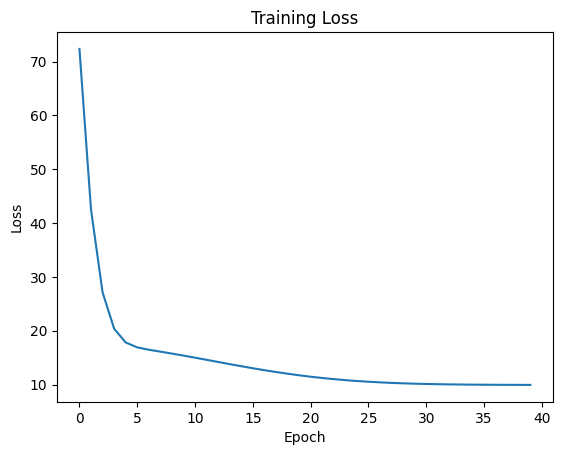

In [2]:
from letsbuildmodels.workflow import train
from letsbuildmodels.models.simple_linear import SimpleLinear
import torch.optim as optim
import torch.nn as nn

# Create the model   
model = SimpleLinear()

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Create the loss function
criterion = nn.MSELoss()

# Train the model
losses = train(model, train_dataloader, optimizer, criterion, epochs=40)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Text(0.5, 1.0, 'Train and Test Loss')

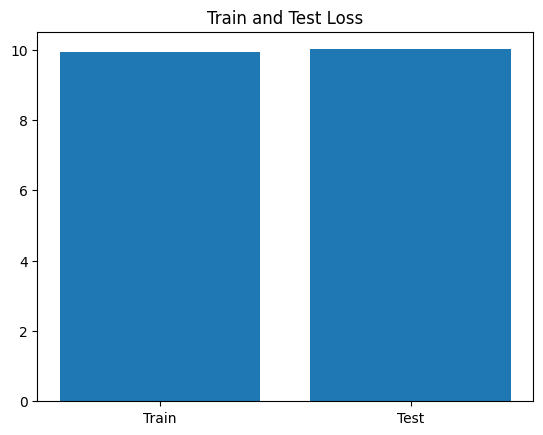

In [4]:
from letsbuildmodels.workflow import test

test_loss = test(model, test_dataloader, criterion)
train_loss = losses[-1].item()
plt.bar(['Train', 'Test'], [train_loss, test_loss])
plt.title('Train and Test Loss')

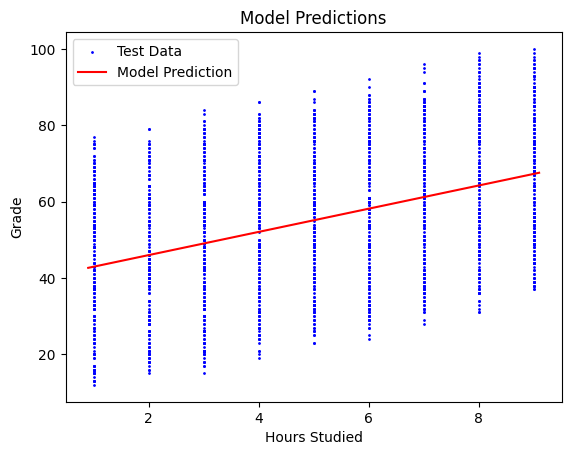

In [16]:
# Make predictions
inputs = torch.arange(0.9, 9.2, 0.1).unsqueeze(1)
outputs = model(inputs)

# Plot the data 
x_vals, y_vals = dataloader_to_numpy(test_dataloader)
plt.scatter(x_vals, y_vals, color='blue', s=1, label='Test Data')
plt.xlabel('Hours Studied')
plt.ylabel('Grade')
plt.title('Model Predictions')
plt.plot(inputs.numpy(), outputs.detach().numpy(), color='red', label='Model Prediction')
plt.legend()
plt.show()